<a href="https://colab.research.google.com/github/wskok2/AI-and-ML/blob/master/color_1b_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Auto Colorization of Black and White Photos

Colab Version 1b

Created by Loke K.S. PhD (loke.ks@gmail.com/ +60122005463 WhatsApp)
![model](https://drive.google.com/uc?export=view&id=1k6THrbqEeiueT7dAHa2QgsWgj1QFg7no)


Generally what we are trying to do is to predict the pixel colour in the output. Digital images are stored as RGB (red, green, blue) values. However, here we want to predict the image pixel given its black & white (luminance) values. We convert the RGB image into a different format such as LAB or YUV where the first channel is the luminance channel. Then we use the luminance channel to predict the other channel values (AB or UV). 

This jupyter notebook incorporates two simple models. 


<a href="http://grassroots-lab.com"><img src="https://drive.google.com/uc?export=view&id=1aGqHRs3sUkmyKSd0L8ZoWBa1G68xVqja" width=200 alt="grassroots-lab.com"></a>
<a href="http://data-smart.io"><img src="https://drive.google.com/uc?export=view&id=1ByBc73AQYB1mjcreTlTMWNmnOB1B5QwR" width=150 alt="data-smart.io"></a>

If you do have your own dataset, download from this link: 

dataset.zip
https://drive.google.com/file/d/1B1F4y7JvoaMTRWQ30UGiAfSNHB3Kl5Dn/view?usp=sharing

test.zip
https://drive.google.com/file/d/1Ld6U2jnvC5CKzxUEUEOvrTeVDU0LI2Eu/view?usp=sharing




In [0]:
#select tensorflow 2.x if necessary
#%tensorflow_version 2.x

In [0]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, InputLayer, Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
#import cv2

print(tf.__version__)

2.2.0-rc3


In [0]:
from google.colab import files
uploaded = files.upload() 


Saving dataset.zip to dataset.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()
#data.printdir()

#Now everything is ready, let us check that by printing content of (data) folder:
data.printdir()

File Name                                             Modified             Size
dataset/                                       2020-04-04 01:21:24            0
dataset/Image1.jpg                             2020-04-04 01:04:02         4218
dataset/Image10.jpg                            2020-04-04 01:04:02         6892
dataset/Image11.jpg                            2020-04-04 01:04:02         5163
dataset/Image12.jpg                            2020-04-04 01:04:02         7031
dataset/Image13.jpg                            2020-04-04 01:04:02         8025
dataset/Image14.jpg                            2020-04-04 01:04:02         7483
dataset/Image15.jpg                            2020-04-04 01:04:02         6983
dataset/Image16.jpg                            2020-04-04 01:04:02         7276
dataset/Image17.jpg                            2020-04-04 01:04:02         7223
dataset/Image19.jpg                            2020-04-04 01:04:02         3282
dataset/Image2.jpg                      

In [0]:
ImagePath='dataset/*.*'
dataset = tf.data.Dataset.list_files(ImagePath)

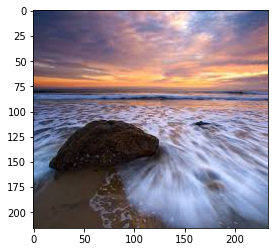

In [0]:
#Check image is uploaded

from PIL import Image
items = os.listdir('dataset')

im = Image.open("dataset/"+items[0])
plt.imshow(im)



In [0]:

def process_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image) #0-255 integer
    image = tf.image.convert_image_dtype(image, tf.float32) #float 0-1
    image = tf.image.resize(image, [128, 128])
    yuv_img = tf.image.rgb_to_yuv(image) 
    X_img = yuv_img[:,:,0]
    X_img = tf.expand_dims(X_img, axis=-1)
    Y_img = yuv_img[:,:,1:] 
    
    return X_img, Y_img

In [0]:
dataset = dataset.map(process_image)
dataset = dataset.batch(12)

### Running the Models

Two different types of models are presented here. You can select one of the model to run each time. After you have tested 1 model, you can run the second model. You have to go through model.fit() and model.predict() (and all steps following it) to display the new results


### Model 1

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(128, 128, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='rmsprop', loss='mse')

### Model 2
This is just a slight modification of Model 1. A few more layers (Dense layer) have been added. It is possible to play around with different layers just to modify the model. 

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(128, 128, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2))) #128x128x2
model.add(Flatten())
model.add(Dense(2048))
model.add(Dense(32768))
model.add(Reshape((128,128,2)))
model.compile(optimizer='rmsprop', loss='mse')

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 512)      

### Fitting the Model
Model fit is the training process where by the algorithm tries to improve its results by reducing the loss function. The loss function measures the difference between the correct output against the predicted output. In this case the correct output is the actual pixel value agansts the predicted pixel value. 

The training process involves the training the model to learn how to associate the chrominance channels given the luminance. 

You can change the epochs to make it train longer. Take a look at the loss value: if the loss value continues to reduce then you can increase the epoch. If the loss value remains stagnant or increases, then the number of epochs is too big as no improvement is furthter available, i.e. pointless to train further.

In [0]:
model.fit(dataset, epochs=30)

Epoch 1/30
10/10 [==============================] - 1s 53ms/step - loss: 0.1163
Epoch 2/30
10/10 [==============================] - 1s 50ms/step - loss: 0.0091
Epoch 3/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0089
Epoch 4/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0088
Epoch 5/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0090
Epoch 6/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0090
Epoch 7/30
10/10 [==============================] - 1s 52ms/step - loss: 0.0094
Epoch 8/30
10/10 [==============================] - 1s 52ms/step - loss: 0.0092
Epoch 9/30
10/10 [==============================] - 0s 50ms/step - loss: 0.0093
Epoch 10/30
10/10 [==============================] - 1s 51ms/step - loss: 0.0089
Epoch 11/30
10/10 [==============================] - 0s 50ms/step - loss: 0.0090
Epoch 12/30
10/10 [==============================] - 1s 50ms/step - loss: 0.0089
Epoch 13/30
10/10 [==================

In [0]:
# Save model
#model.save("color_1a.h5")

In [0]:
from google.colab import files
uploaded = files.upload() 

Saving test.zip to test.zip


In [0]:
data = zipfile.ZipFile(io.BytesIO(uploaded['test.zip']), 'r')
data.extractall()

In [0]:
def process_testimage(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image) #0-255 integer
    image = tf.image.convert_image_dtype(image, tf.float32) #float 0-1
    image = tf.image.resize(image, [128, 128])
    yuv_img = tf.image.rgb_to_yuv(image) 
    X_img = yuv_img[:,:,0]
    X_img = tf.expand_dims(X_img, axis=-1)
    #Y_img = yuv_img[:,:,1:] 
    
    return X_img

ImageTest='test/*.*'  
testset = tf.data.Dataset.list_files(ImageTest)
testset = testset.map(process_testimage).batch(1)
#print(testset)

In [0]:
iterator = testset.__iter__()
#for i,inp in enumerate(iterator):
#    print(i,inp[0,:,:,:])

In [0]:
# Test model
output = model.predict(testset)

In [0]:
for i,inp in enumerate(iterator):
    #print(inp[0,:,:,:])
    cur = np.zeros((128,128, 3))
    cur[:,:,0] = inp[0,:,:,0]
    cur[:,:,1:] = output[i]
    yuv=tf.image.yuv_to_rgb(cur)*255
    print("img_1b_"+str(i)+".png")
    imsave("img_1b_"+str(i)+".png",yuv.numpy() )    

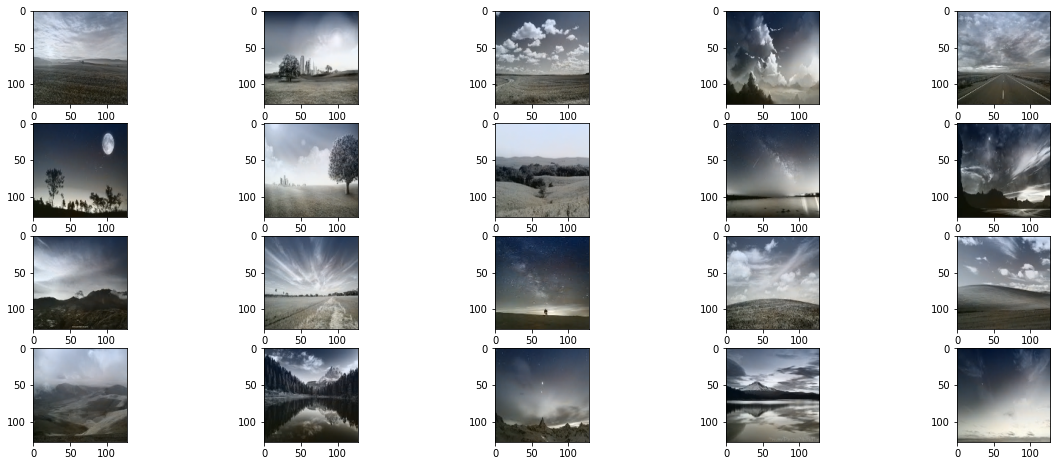

In [0]:
items=[file for file in os.listdir('.') if file.endswith('.png')]


plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(items):
    image = Image.open(image)
    plt.subplot(len(items) / columns + 1, columns, i + 1)
    plt.imshow(image)

### Further thoughts

Remember we are using a black and white pixel to predict the other color channels (UV, in our case). 

1.   What other information have been used?
2.   Sre there any other information we can use to improve our prediction?
3.   How can we accomplish that?


